# PCA

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
from dataset import HARDataset
from transforms import stft

In [4]:
dataset = HARDataset('motionsense-dataset')

In [8]:
features = [feat for feat, _ in iter(dataset)]

classes = [class_ for _, class_ in iter(dataset)]

In [9]:
len(features), len(classes)

(360, 360)

In [10]:
features[0].shape

(814, 12)

In [11]:
X = np.vstack(features)

In [12]:
X.shape

(1412865, 12)

### Standarize

In [13]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

In [14]:
X_centered = (X - X_mean) / X_std

In [15]:
pca = PCA()

In [16]:
X_pca = pca.fit_transform(X_centered)

In [17]:
pca.mean_

array([-1.21012640e-15,  4.05444563e-14, -9.45522950e-16, -4.08220340e-15,
        1.24558220e-15, -6.72453670e-15, -1.44407828e-16, -1.86390291e-16,
        6.61387643e-16,  1.22125417e-16, -1.49404394e-15, -1.94594313e-15])

In [18]:
pca.components_[0]

array([ 0.36335296,  0.47303857,  0.02106487,  0.45063366, -0.46491061,
       -0.45148013, -0.00275983, -0.0152385 ,  0.01620941, -0.1034598 ,
       -0.03080352,  0.09253739])

### Plotting frecuency components of the PCA components

In [19]:
feats_by_class = {"dws": [], "ups": [], "wlk": [], "std": [], "sit": [], "jog": []}

for feature, class_ in zip(features, classes):
    feats = np.mean(stft(pca.transform(feature)[:], 256, pad=False), axis=0)[:128]
    feats_by_class[class_].append(feats)

In [20]:
feats_by_class['dws'][0].shape

(128, 12)

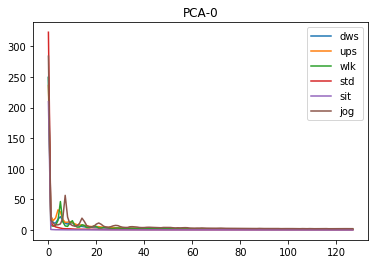

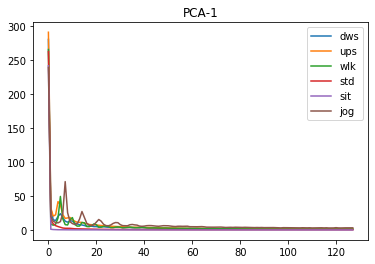

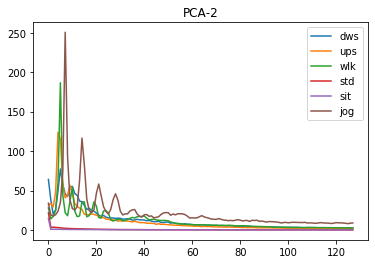

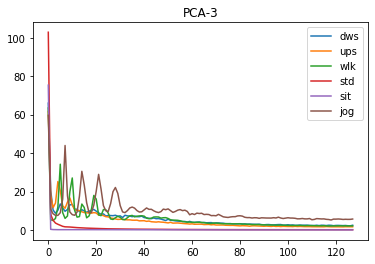

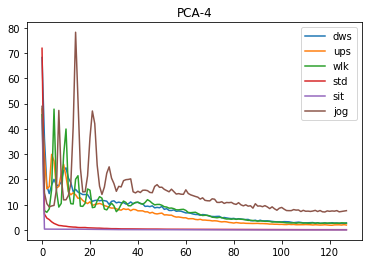

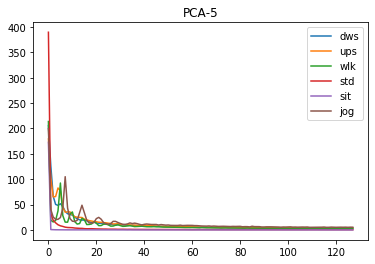

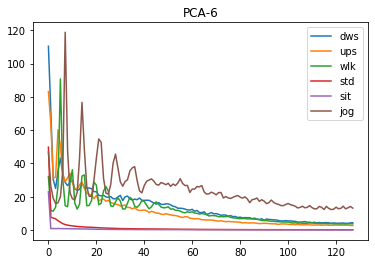

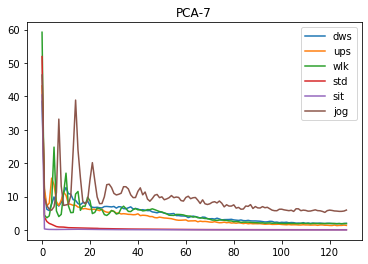

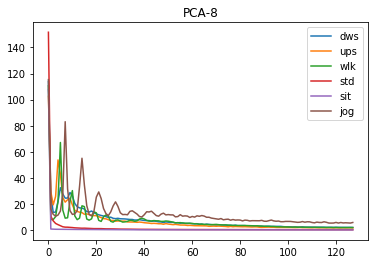

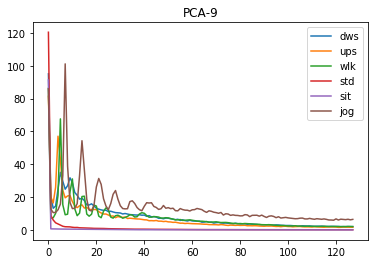

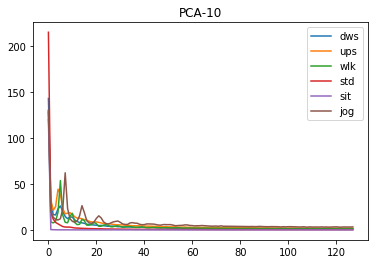

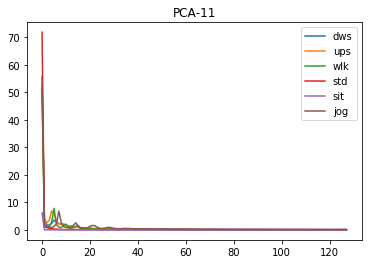

In [23]:
for i in range(12):
    plt.figure()
    plt.title("PCA-" + str(i))
    for class_ in feats_by_class:
        plt.plot(np.mean(feats_by_class[class_], axis=0)[:, i], label=class_)
    plt.legend()

Plotting in logarithmic scale

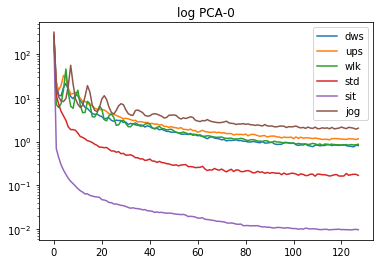

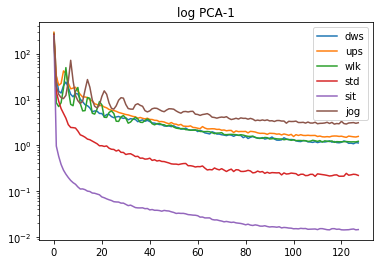

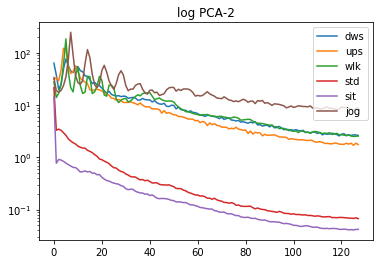

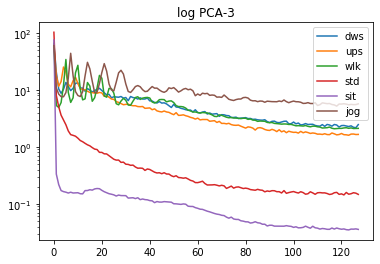

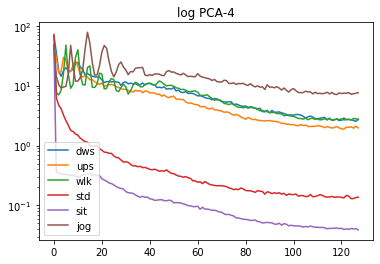

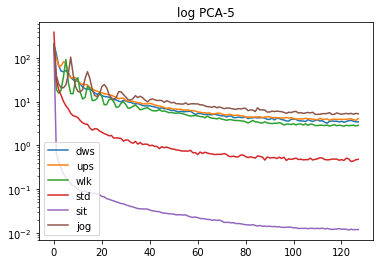

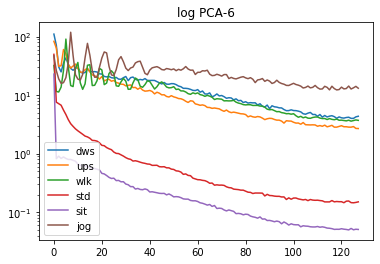

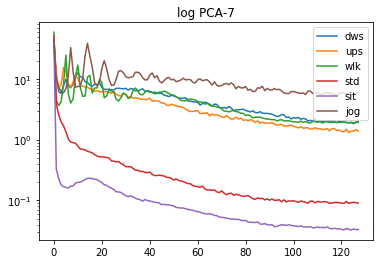

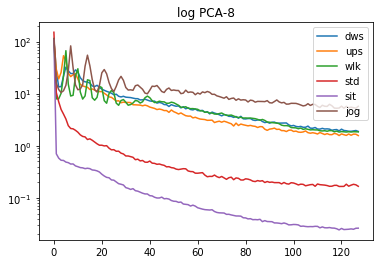

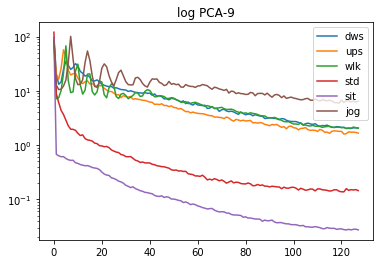

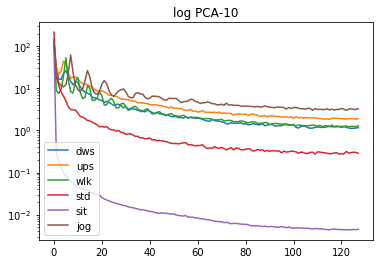

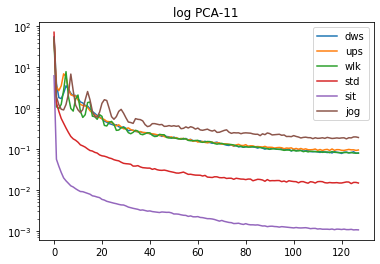

In [24]:
for i in range(12):
    plt.figure()
    plt.yscale('log')
    plt.title("log PCA-" + str(i))
    for class_ in feats_by_class:
        plt.plot(np.mean(feats_by_class[class_], axis=0)[:, i], label=class_)
    plt.legend()